In [3]:
import pandas as pd
import os
import librosa

In [4]:
#pip install librosa

In [5]:


audio_dataset_path='C:/Users/DELL/Desktop/birds_classification/wavfiles/'                    #change the path 
metadata=pd.read_csv('C:/Users/DELL/Desktop/birds_classification/bird_songs_metadata.csv')
metadata.head()

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [6]:
metadata['name'].value_counts()


Song Sparrow            1256
Northern Mockingbird    1182
Northern Cardinal       1074
American Robin          1017
Bewick's Wren            893
Name: name, dtype: int64

In [7]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [8]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["filename"]))
    final_class_labels=row["name"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

5422it [05:01, 17.96it/s]


In [9]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','name'])
extracted_features_df.head()
# Storing the dataframe to pickle for further processing
extracted_features_df.to_pickle("extracted_df.pkl")
extracted_features_df.head()

,feature,name
0,"[-132.85225, 81.1399, 17.018223, 54.974297, -1...",Bewick's Wren
1,"[-147.74393, 99.42544, 20.885643, 44.11881, 1....",Bewick's Wren
2,"[-92.42778, 84.10635, 17.36278, 53.86046, -8.7...",Bewick's Wren
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",Bewick's Wren
4,"[-107.95914, 92.416, 17.773254, 43.13245, -1.8...",Bewick's Wren


In [10]:
final = pd.read_pickle("./extracted_df.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["name"].tolist())

In [11]:
        import IPython.display as ipd
        import librosa
        import librosa.display
        import pandas as pd
        import os, time, warnings
        import seaborn as sns
        import numpy as np
        from tqdm import tqdm
        import matplotlib.pyplot as plt
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import LabelEncoder
        from tensorflow.keras.utils import to_categorical
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import (
            Dense,
            Conv1D,
            MaxPooling1D,
            BatchNormalization,
            Dropout, 
            Flatten,
            Conv2D,
            MaxPool2D,
        )

In [12]:
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])


Number of training samples =  4879
Number of testing samples =  543


In [14]:

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(40,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              41000     
                                                                 
 dense_1 (Dense)             (None, 750)               750750    
                                                                 
 dense_2 (Dense)             (None, 500)               375500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 100)               25100     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 5)                 2

In [17]:
ANN_Model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [18]:
num_epochs = 100
num_batch_size = 32

t0 = time.time()

history = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")


Epoch 1/100
153/153 [==============================] - 6s 34ms/step - loss: 0.0313 - accuracy: 0.9947 - val_loss: 0.3390 - val_accuracy: 0.9411
Epoch 2/100
153/153 [==============================] - 5s 32ms/step - loss: 0.0533 - accuracy: 0.9861 - val_loss: 0.3398 - val_accuracy: 0.9613
Epoch 3/100
153/153 [==============================] - 5s 35ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.4515 - val_accuracy: 0.9484
Epoch 4/100
153/153 [==============================] - 5s 35ms/step - loss: 0.0510 - accuracy: 0.9906 - val_loss: 0.1699 - val_accuracy: 0.9687
Epoch 5/100
153/153 [==============================] - 6s 37ms/step - loss: 0.0282 - accuracy: 0.9922 - val_loss: 0.1541 - val_accuracy: 0.9705
Epoch 6/100
153/153 [==============================] - 5s 34ms/step - loss: 0.0734 - accuracy: 0.9840 - val_loss: 0.2313 - val_accuracy: 0.9429
Epoch 7/100
153/153 [==============================] - 5s 36ms/step - loss: 0.0284 - accuracy: 0.9953 - val_loss: 0.1884 - val_accuracy:

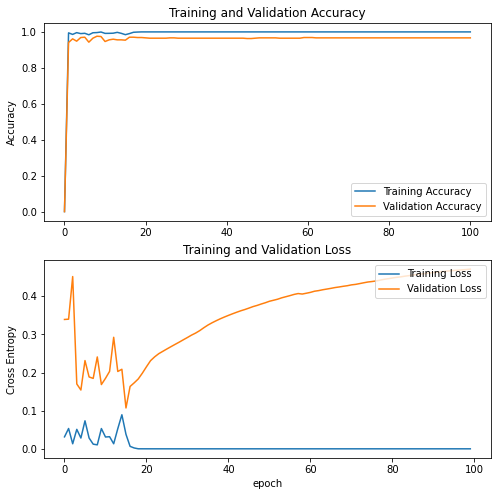

In [19]:
 acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()